<h3 style="font-family: 'Arial'">Рубежный контроль №1 по дисциплине "Технологии машинного обучения"</h3>
<h5 style="font-family: 'Arial'">Вариант №1, датасет № 6</h5>
<p style="font-family: 'Arial'">Выполнил: студент группы РТ5-61 Саврасов П.А.</p>
<pre style="font-family: 'Arial'"><b>Задание:</b>
Для заданного набора данных проведите корреляционный анализ.
В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски.
Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.
</pre>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

<pre style="font-family: 'Arial'">Рассмотрим полученный датасет:</pre>

In [3]:
data = pd.read_csv('Admission_Predict.csv', sep=',')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

<pre style="font-family: 'Arial'">Из таблицы выше видно, что все признаки числовгого типа. </pre>
<pre style="font-family: 'Arial'">Проверим датасет на наличие пропущенных значений. </pre>

In [5]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

<pre style="font-family: 'Arial'">Из таблицы выше видно, пропущенных зеачений нет. </pre>
<pre style="font-family: 'Arial'">Проведём корреляционный анализ. </pre>

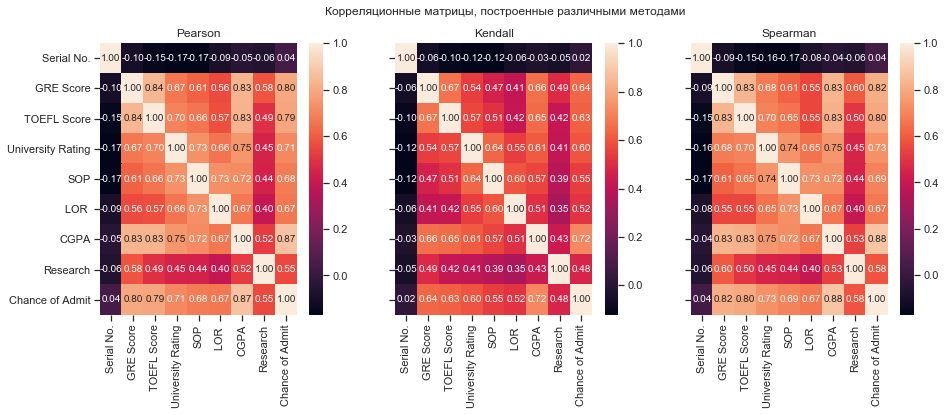

In [5]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

<pre style="font-family: 'Arial'">На основе вышепредставленной тепловой карты корреляции можно сделать вывод,
что целевй признак "Шанс поступления" зависит от ценок GRE, TOEFL и CGPA. 
Рассмотрим графики зависимостей этих признаков от целевого:</pre>

<pre style="font-family: 'Arial'">Зависимость шанса поступления от оценки GRE:</pre>

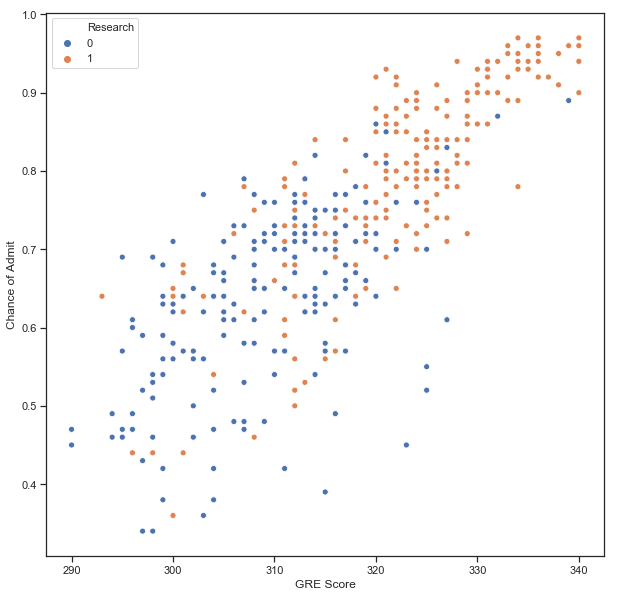

In [16]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='GRE Score', y='Chance of Admit', data=data,  hue='Research')

<pre style="font-family: 'Arial'">Зависимость шанса поступления от оценки TOEFL:</pre>

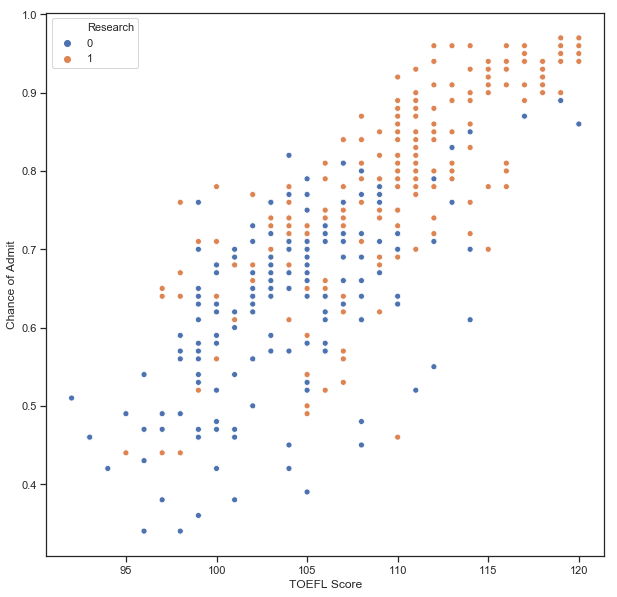

In [17]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='TOEFL Score', y='Chance of Admit', data=data, hue='Research')

<pre style="font-family: 'Arial'">Зависимость шанса поступления от оценки CGPA:</pre>

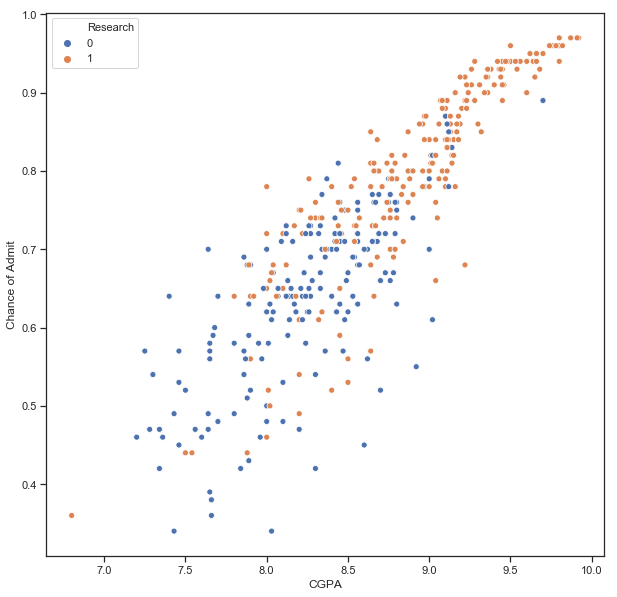

In [18]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='CGPA', y='Chance of Admit', data=data, hue='Research')

<pre style="font-family: 'Arial'">Как видно из вышеуказанных графиков шанс полступления растёт при росте оценок, при этом заметно, что наличие исследовний 
(оранжевые точки - исследование есть, синие - нет) больше встречается у тех, у кого оценка и следовательтно шанс поступлекния выше.</pre>